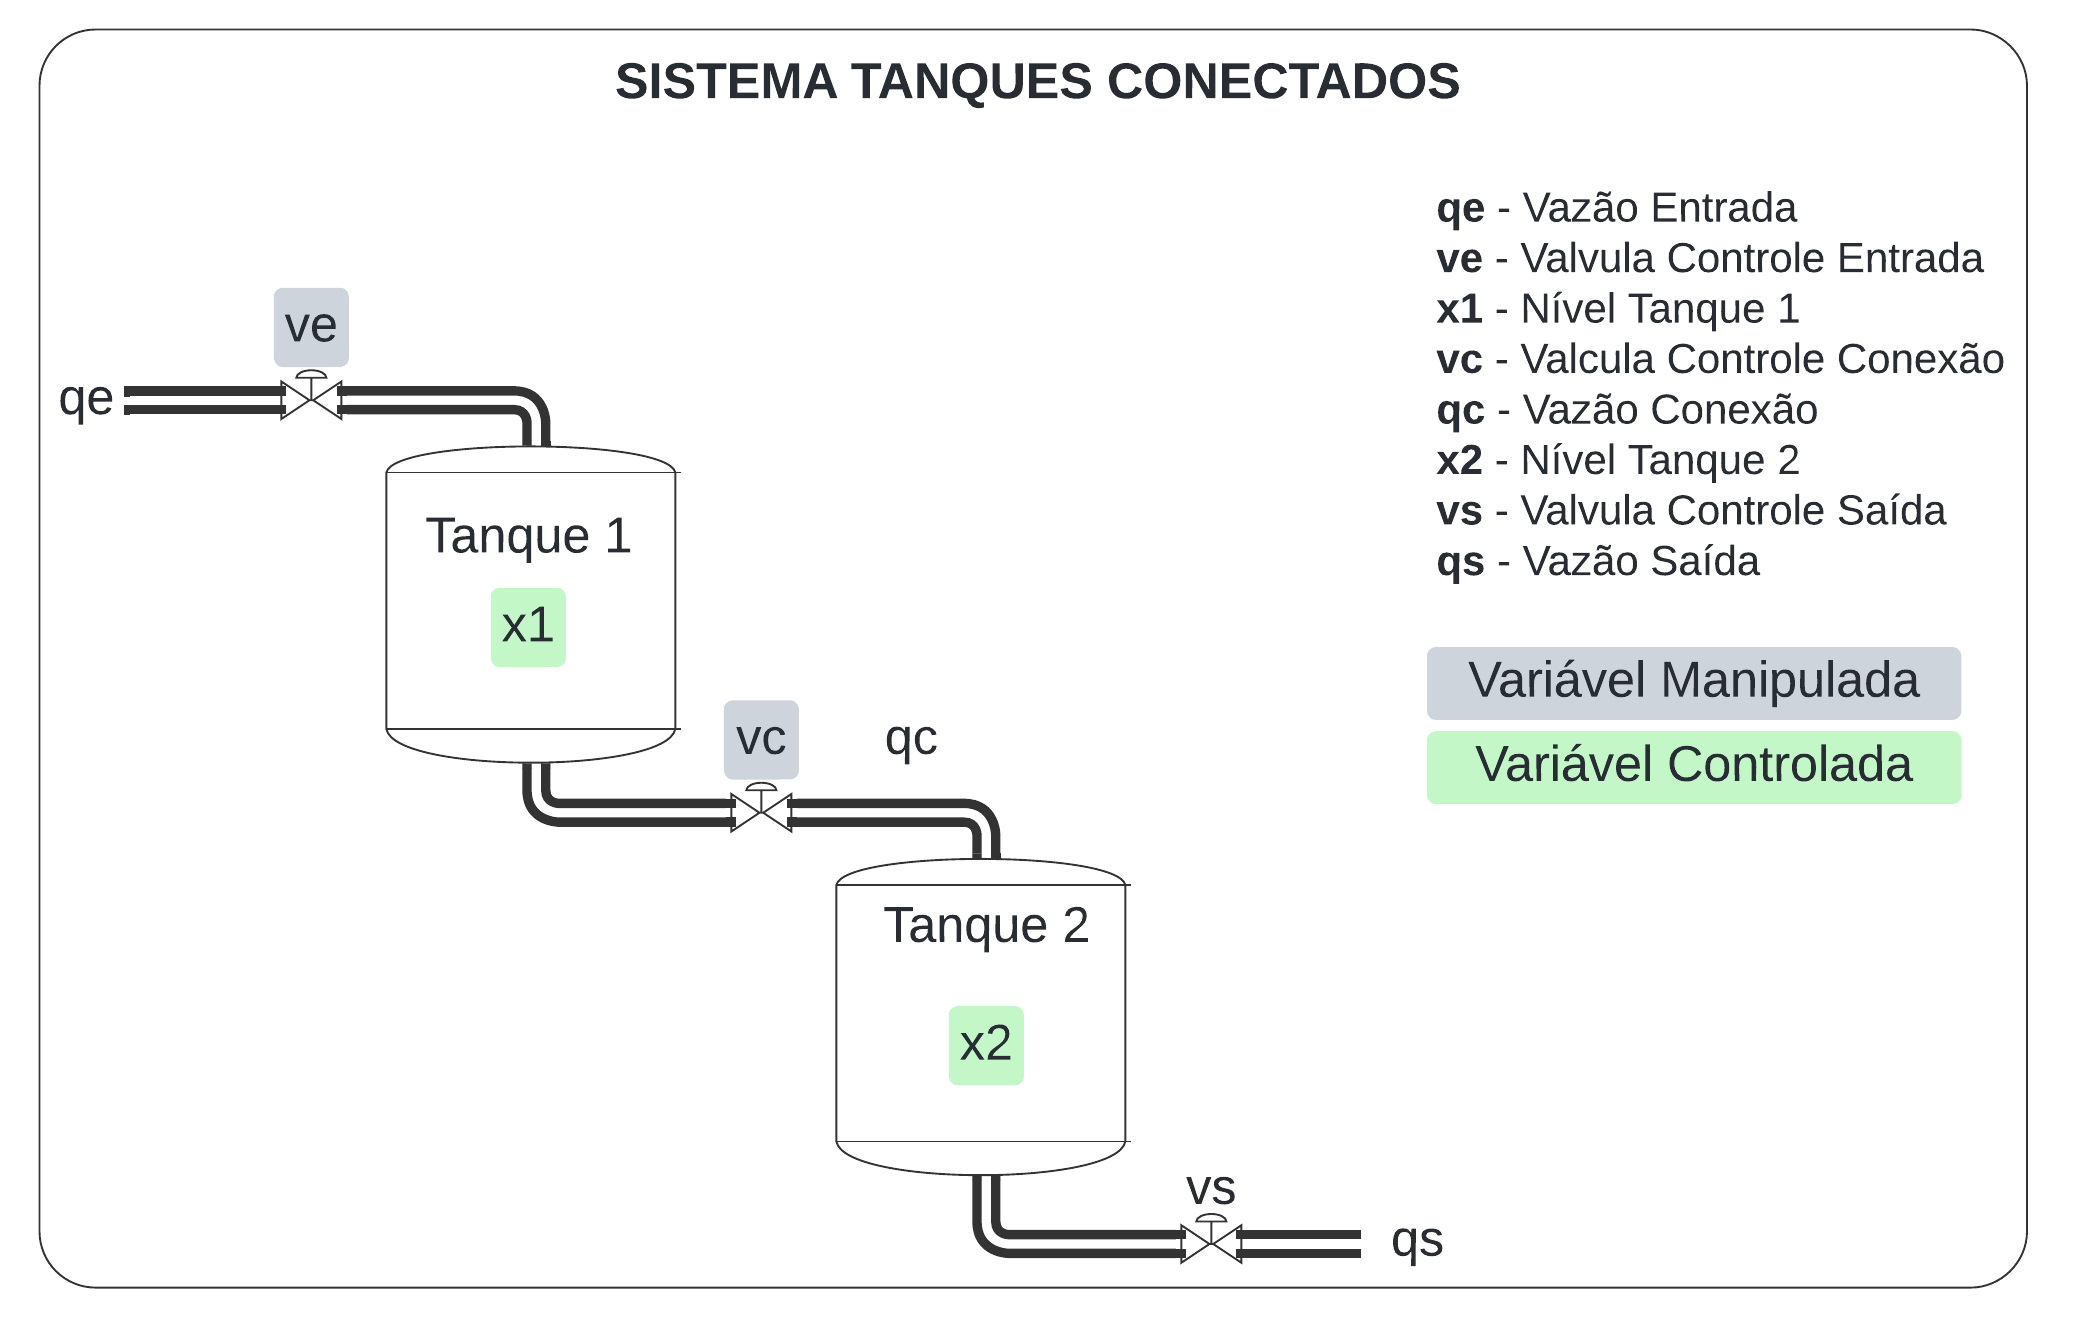

In [33]:
%cd /content/drive/MyDrive/Colab Notebooks/Mestrado/Final

/content/drive/MyDrive/Colab Notebooks/Mestrado/Final


In [37]:
#keras 3
!pip install -q tensorflow==2.16.1
!pip install -q keras==3.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 820.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [19]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras import Dense, Lambda

####*IMPORANT*: Have to do this line *before* importing tensorflow
SEED = 1
os.environ['PYTHONHASHSEED']=str(SEED)

import matplotlib.pyplot as plt
from matplotlib import patches
import random
import numpy as np
import pandas as pd
#import tensorflow as tf
#import keras
from pandas import DataFrame, read_csv
import math
#from keras import layers
#from keras.models import Model, Sequential, load_model
from functools import partial
import joblib
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

tf.keras.backend.set_floatx('float64')
tf.keras.backend.clear_session()

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(SEED)
   tf.random.set_seed(SEED)
   np.random.seed(SEED)
   random.seed(SEED)

reset_random_seeds()

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [4]:
def plot_sim_history(sim_history_x1, sim_history_x2):
  plt.figure(figsize=(16, 10))  # Define o tamanho do gráfico

  plt.subplot(3, 1, 1)
  plt.plot(sim_history_x1['x'], label='x1')
  plt.plot(sim_history_x1['ref'], label='ref1', linestyle=':')
  plt.plot(sim_history_x2['x'], label='x2')
  plt.plot(sim_history_x2['ref'], label='ref2', linestyle=':')
  plt.xlabel("Steps/Time(s)")
  plt.ylabel("Level(m)")
  plt.title('Gráfico de Controle Aprendizado Por Reforço')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout

  plt.subplot(3, 1, 2)
  plt.plot(sim_history_x1['qe'], label='qe')
  plt.plot(sim_history_x1['qs'], label='qs')
  plt.ylabel("(m^3/s)")
  plt.title('Gráfico de Sinal Aprendizado Por Reforço')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout


  plt.subplot(3, 1, 3)
  plt.plot(sim_history_x1['erro'], label='erro')
  plt.ylabel("erro (m)")
  plt.title('Gráfico de Erro Aprendizado Por Reforço')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout

  plt.show()

In [5]:
def plotting(history):
    plt.figure(figsize=(16, 4))
    plt.semilogy(history.history['loss'], color = "red")
    plt.semilogy(history.history['val_loss'], color = "blue")
    red_patch = patches.Patch(color='red', label='Training')
    blue_patch = patches.Patch(color='blue', label='Validation')
    plt.legend(handles=[red_patch, blue_patch])
    plt.xlabel('Epochs')
    plt.ylabel('MSE loss')

In [6]:
# Criando o gráfico
def plot_sim_degree(sim_degree):
  plt.figure(1, figsize=(16, 4))  # Define o tamanho do gráfico

  #fig, ax = plt.subplots()

  # Plot da variável de controle
  #plt.plot(sim_degree["x1"], label='X1')
  #plt.plot(sim_degree["NN_x1"], label='X1 Rede Neural', linestyle=':')
  plt.scatter(sim_degree["t"], sim_degree["x1"]   , label='X1'            , alpha=0.5)
  plt.scatter(sim_degree["t"], sim_degree["NN_x1"], label='X1 Rede Neural', alpha=1.0, marker='+')

  # Adicionando rótulos aos eixos e título
  plt.xlabel('Tempo')
  plt.ylabel('Nível')
  plt.title('Comportamento Processo x Modelo ao Degrau Unitário - x1')

  # Adicionando legenda
  plt.legend()

  # Exibindo o gráfico
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout


  plt.figure(2, figsize=(16, 4))  # Define o tamanho do gráfico

  #fig, ax = plt.subplots()

  # Plot da variável de controle
  plt.scatter(sim_degree["t"], sim_degree["x2"]   , label='X2'            , alpha=0.5)
  plt.scatter(sim_degree["t"], sim_degree["NN_x2"], label='X2 Rede Neural', alpha=1.0, marker='+')


  # Adicionando rótulos aos eixos e título
  plt.xlabel('Tempo')
  plt.ylabel('Nível')
  plt.title('Comportamento Processo x Modelo ao Degrau Unitário - x2')

  # Adicionando legenda
  plt.legend()

  # Exibindo o gráfico
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout

  plt.show()

Processo que representa um o nível de um tanque com um registro

In [9]:
import math

# Process Const
area = 16
max_level = 12
def tank_xdot(x, qe, valve=100, valve_k = 1):
  if x >= 0:
    qs = valve_k * (valve / 100) * math.sqrt(x)
  else:
    qs = 0
  xd = (qe - qs) / area
  return xd, qs

def tank_rk(x0, qe, valve=100, valve_k = 1, t=0.2):
  a=x0
  b=qe
  c=valve
  #call 1
  xd, qs = tank_xdot(x0, qe, valve, valve_k);
  savex0 = x0;
  phi = xd;
  x0 = savex0 + 0.5 * t * xd;

  #call two
  xd, qs = tank_xdot(x0, qe, valve, valve_k);
  phi = phi + 2 * xd;
  x0 = savex0 + 0.5 * t * xd;

  #call three
  xd, qs = tank_xdot(x0, qe, valve, valve_k);
  phi = phi + 2 * xd;
  x0 = savex0 + t * xd;

  #call four
  xd, qs = tank_xdot(x0, qe, valve, valve_k);
  x = savex0 + (phi + xd) * t / 6;

  if x < 0:
    x = 0

  if x > max_level:
    x = max_level

  if np.isnan(x):
    x = 0

  if np.isnan(qs):
    qs = 0

  return x, qs;

In [10]:
pd.set_option('display.max_rows', None)  # Mostrar todas as linhas
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.width', 1000)

In [11]:
# Parametros Globais
np.random.seed(56)
k1 = 2
k2 = 1
ts = 1
vs = 50
horizon = 5
num_data = 10000
data_name = f"NumData-{num_data}_Hor-{horizon}_Ts-{ts}"
data_name

'NumData-10000_Hor-5_Ts-1'

In [12]:
scaler_x_train = joblib.load(f"DataTrain_Scaler-x_{data_name}.pkl")
x_train = np.load(f"DataTrain-x_{data_name}.npy")
y_train = np.load(f"DataTrain-y_{data_name}.npy")

Modelo de Rede Neural

In [60]:
model = keras.Sequential()
model.add(keras.Input(shape=(5,)))
#model.add(keras.layers.Lambda(lambda x: x[:]))

#model.add(keras.layers.Dense(32, activation=partial(tf.nn.leaky_relu, alpha=0.5)))
#model.add(keras.layers.Dense(64, activation=partial(tf.nn.leaky_relu, alpha=0.5)))

model.add(keras.layers.Dense(32, input_dim=5, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(2, kernel_initializer=tf.initializers.zeros))

In [61]:
lr=0.001
optimizer = tf.optimizers.Adam(learning_rate=lr)
loss=tf.losses.MeanSquaredError()
metrics=[tf.metrics.MeanSquaredError()]
model.compile(loss=loss, metrics=metrics, optimizer=optimizer)

In [62]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitora a métrica de validação
    patience=15,  # Número de épocas sem melhoria antes de parar
    restore_best_weights=True  # Restaura os pesos do modelo à melhor época
)

In [63]:
num_epochs=200
num_batch_size=10
history = model.fit(
            x = x_train,
            y = y_train,
            batch_size = num_batch_size,
            epochs = num_epochs,
            verbose = 1,
            callbacks=[early_stopping],
            validation_split = 0.2
          )
history

Epoch 1/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1179 - mean_squared_error: 0.1179 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 2/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 3/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 4/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 7/200
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_los

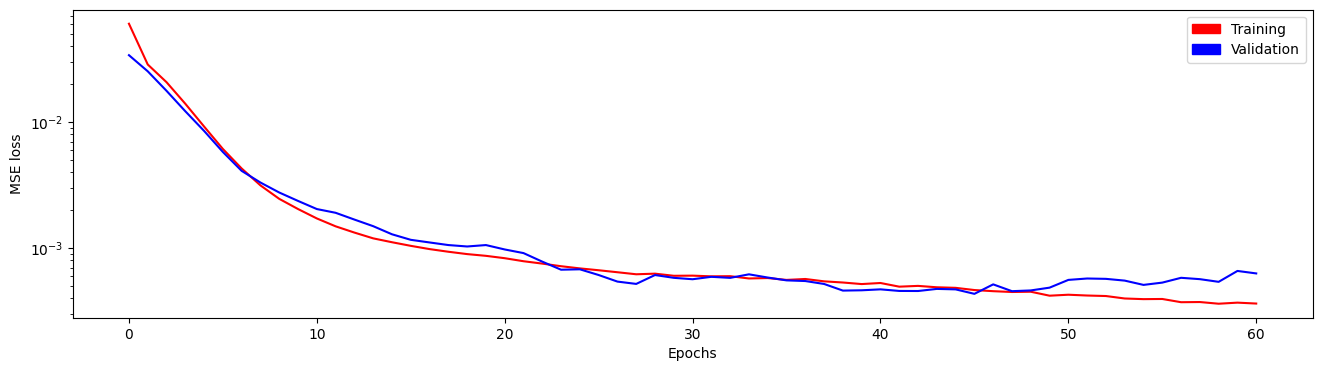

In [64]:
plotting(history)

Simulação Degrau Unitário para verificar se a rede neural tem comportamento semelhante ao processo.

In [65]:
sim_degree_columns = ["t","qe", "qc", "qs", "x1", "x2", "NN_x1", "NN_x2"]
sim_degree = np.zeros((1,len(sim_degree_columns)))

pred_nn_columns = ["qe", "qc", "qs", "NN_x[0]", "NN_x[1]", "diff2[0]", "diff2[1]", "NN_pred[0]", "NN_pred[1]"]
pred_nn = np.zeros((1,len(pred_nn_columns)))

qe = 2.0;
vc = 100
t = 0

for l in range(13):
  t+=1

  x = [l, l];
  NN_x =  [l, l];

  NN_in = np.array([[NN_x[0], qe, vc, NN_x[1], vs]])
  NN_in = scaler_x_train.transform(NN_in)
  NN_pred = model.predict(NN_in, verbose = None);
  #NN_pred = scaler_y_train.inverse_transform(NN_pred)
  NN_x[0] += NN_pred[0][0]
  NN_x[1] += NN_pred[0][1]

  for _ in range(horizon):
    x[0], qc = tank_rk(x[0], qe, vc, k1, ts)
    x[1], qs = tank_rk(x[1], qc, vs, k2, ts)

  sim_degree = np.vstack((sim_degree, (t, qe, qc, qs, x[0], x[1], NN_x[0], NN_x[1])))
sim_degree = pd.DataFrame(data = sim_degree, columns = sim_degree_columns)
pred_nn = pd.DataFrame(data = pred_nn, columns = pred_nn_columns)
sim_degree

,t,qe,qc,qs,x1,x2,NN_x1,NN_x2
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,2.0,1.195936,0.249408,0.357526,0.248822,0.282860,0.328364
2,2.0,2.0,2.000000,0.602505,1.000000,1.452049,1.026002,1.453291
3,3.0,2.0,2.659498,0.808395,1.768242,2.614007,1.779789,2.613729
4,4.0,2.0,3.213896,0.967947,2.582294,3.747686,2.578335,3.748780
5,5.0,2.0,3.700010,1.102716,3.422532,4.863932,3.424076,4.871040
6,6.0,2.0,4.137766,1.221488,4.280290,5.968127,4.271122,5.995238
7,7.0,2.0,4.539082,1.328850,5.150829,7.063367,5.156740,7.069043
8,8.0,2.0,4.911705,1.427552,6.031224,8.151618,6.044790,8.145058
9,9.0,2.0,5.260991,1.519393,6.919519,9.234219,6.924260,9.232418


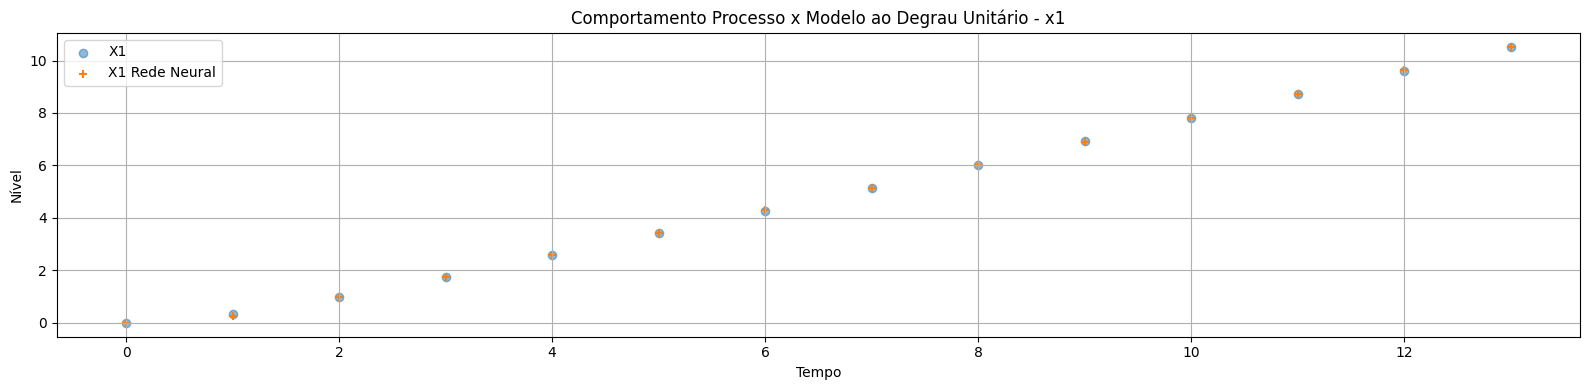

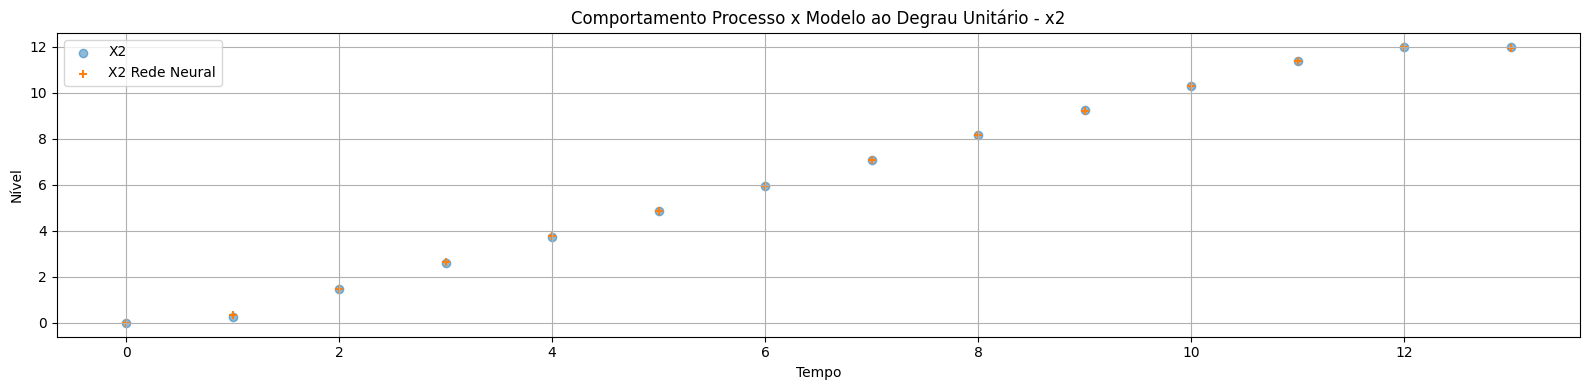

In [26]:
 plot_sim_degree(sim_degree)

In [46]:
model.save_weights(f"xxx/Model_{data_name}.weights.h5")

In [48]:
model.save(f"xxx/Model_{data_name}.keras")

In [51]:
model = keras.models.load_model(f"xxx/Model_{data_name}.keras")

ValueError: The `{arg_name}` of this `Lambda` layer is a Python lambda. Deserializing it is unsafe. If you trust the source of the config artifact, you can override this error by passing `safe_mode=False` to `from_config()`, or calling `keras.config.enable_unsafe_deserialization().

In [39]:
print("Versão do Keras:", keras.__version__)
print("Versão do TensorFlow:", tf.__version__)
import sys
print("Versão do Python:", sys.version)

Versão do Keras: 3.3.3.dev2024050503
Versão do TensorFlow: 2.15.0
Versão do Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [53]:
model = keras.Sequential()
model.add(keras.layers.Lambda(lambda x: x[:]))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, kernel_initializer=tf.initializers.zeros))
model.load_weights(f"xxx/Model_{data_name}.weights.h5")

ValueError: A total of 3 objects could not be loaded. Example error message for object <Dense name=dense_12, built=False>:

Layer 'dense_12' was never built and thus it doesn't have any variables. However the weights file lists 2 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'dense_12'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'dense_12', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the layer (i.e. its variables) upon deserialization.

List of objects that could not be loaded:
[<Dense name=dense_12, built=False>, <Dense name=dense_13, built=False>, <Dense name=dense_14, built=False>]

In [66]:
# serialize model to JSON
model_json = model.to_json()
with open("xxx/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("xxx/model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [67]:

# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense

# load json and create model
json_file = open('xxx/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("xxx/model.weights.h5")
print("Loaded model from disk")

Loaded model from disk
